# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



In [14]:
#load csv file into a DataFrame
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [15]:
#getting the top twenty cities based on number of occurence  
cities = df['City'].value_counts().head(10)
cities

City
New York        114
Los Angeles      95
Houston          88
San Antonio      48
Washington       45
Chicago          41
Springfield      40
Austin           40
Las Vegas        38
Philadelphia     38
Name: count, dtype: int64

In [21]:
#choose zipcodes to use from city column
chosen_zipcodes = ['New York','Los Angeles','Houston','San Antonio','Washington','Chicago','Springfield','Austin','Las Vegas','Philadelphia']

#filter data based on chosen zipcodes 
filtered_df = df[df['City'].isin(chosen_zipcodes)]



In [22]:
#print the filtered_data
print(filtered_df)


       RegionID  RegionName         City State       Metro  CountyName   
0         84654       60657      Chicago    IL     Chicago        Cook  \
3         84616       60614      Chicago    IL     Chicago        Cook   
5         91733       77084      Houston    TX     Houston      Harris   
6         61807       10467     New York    NY    New York       Bronx   
7         84640       60640      Chicago    IL     Chicago        Cook   
...         ...         ...          ...   ...         ...         ...   
14095     60447        6794   Washington    CT  Torrington  Litchfield   
14206     66105       19954      Houston    DE       Dover        Kent   
14329     59099        3280   Washington    NH   Claremont    Sullivan   
14355     60446        6793   Washington    CT  Torrington  Litchfield   
14689     59102        3284  Springfield    NH   Claremont    Sullivan   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09   
0             1  334200.0  335

# Step 2: Data Preprocessing

In [59]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    date_columns = df.columns[1:]
    
    datetime_columns = [col for col in date_columns if pd.to_datetime(df[col], format= '%Y-%m', errors='coerce').notna().all()]
    
    df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime, format='%Y-%m')
    
    return df


In [ ]:
return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [65]:
dates = filtered_df.columns.values[7:]
dates

array(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', 

In [72]:
filtered_df[dates].info()

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 0 to 14689
Columns: 265 entries, 1996-04 to 2018-04
dtypes: datetime64[ns](265)
memory usage: 1.2 MB


**Handling missing values**

In [28]:
#determining if there are missing values
filtered_df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         2
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [68]:
filtered_df[dates].isnull()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14095,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
14206,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
14329,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
14355,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [30]:
#make a copy of filtered df
filtered_df = filtered_df.copy()
#dropping missing values
filtered_df.fillna(method='ffill', inplace=True)

In [31]:
#confirming there is no null value
filtered_df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [60]:
#converting the date columns to datetime dataset
filtered_df_1 = get_datetimes(filtered_df)


# Step 3: EDA and Visualization

In [61]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

ConversionError: Failed to convert value(s) to axis units: array([NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT], dtype=object)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

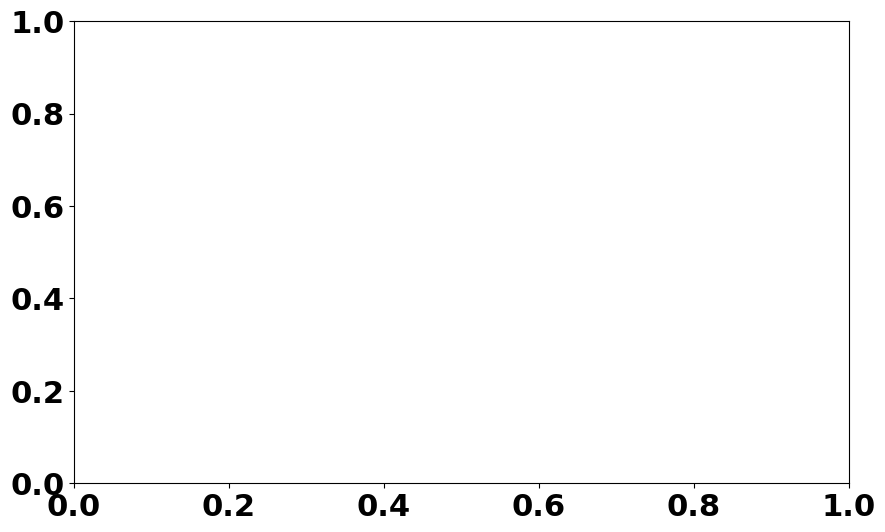

In [63]:
filtered_df_1_figure, ax = plt.subplots(figsize=(10, 6))
ax.plot(filtered_df_1, label = "Data")

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results